In [250]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt 

In [251]:
# load the weather data from a json
with open("../mike_analytics/LA_weather_data.json", 'r') as myfile:
    data=myfile.read()

# parse file
data_json = json.loads(data)

In [252]:
# make dataframe that contains the day, time, temperature, and the cloud percentage by the hour 
# Convert temp: K -> F

days=[]
time=[]
temp=[]
clouds=[]

for i in range(len(data_json)):
    days.append(data_json[i]['dt_iso'][0:10])
    time.append(data_json[i]['dt_iso'][11:19])
    temp.append(1.8*(data_json[i]["main"]["temp"]-273)+32)
    clouds.append(data_json[i]["clouds"]["all"])
    
weather_hourly_df = pd.DataFrame({"Day": days, "Time": time, "Temperature": temp, "Cloud %": clouds})
weather_hourly_df.set_index('Day').head()

,Time,Temperature,Cloud %
Day,,,
2012-10-01,13:00:00,65.966000,8
2012-10-01,14:00:00,65.956663,8
2012-10-01,15:00:00,65.947269,8
2012-10-01,16:00:00,65.937931,8
2012-10-01,17:00:00,65.928594,8


In [318]:
# make dataframe that contains the day, time, temperature, and the cloud percentage by the day
# form weather condition list that marks all daily cloud avrages that are less than 10% as "good" and the rest,"bad" 

days=weather_hourly_df["Day"].unique()
temp=[]
clouds=[]
weather=[]

for day in days:
    day_df=weather_hourly_df.loc[weather_hourly_df["Day"]==day]
    temp.append(day_df["Temperature"].mean())
    clouds.append(day_df["Cloud %"].mean())
    if day_df["Cloud %"].mean() > 10: 
        weather.append("r")
    else:
        weather.append("b")
    
    
weather_df = pd.DataFrame({"Day": days, "Mean temperature": temp, "Mean cloud %": clouds, "Weather Condition":weather})
weather_df.set_index('Day').head()

,Mean temperature,Mean cloud %,Weather Condition
Day,,,
2012-10-01,65.919210,8.000000,b
2012-10-02,73.201709,6.083333,b
2012-10-03,78.815375,1.708333,b
2012-10-04,73.396250,55.666667,r
2012-10-05,67.907000,38.875000,r


In [324]:
weather_df["Weather Condition"]

0       b
1       b
2       b
3       r
4       r
       ..
2555    b
2556    r
2557    b
2558    b
2559    b
Name: Weather Condition, Length: 2560, dtype: object

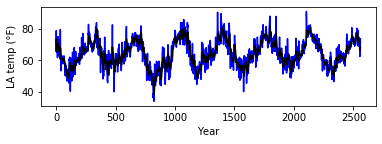

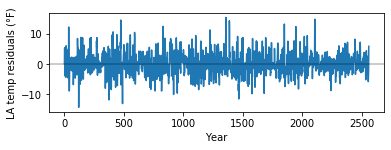

In [352]:
plt.subplot2grid((2,1), (0,0))
plt.plot(weather_df["Mean temperature"], color= 'b')
plt.xlabel('Year')
plt.ylabel('LA temp (°F)')

test=weather_df["Mean temperature"]
plt.plot(test.ewm(span = 10).mean(),  color="black")
plt.show()

plt.subplot2grid((2,1), (0,0))
test=weather_df["Mean temperature"]
plt.plot(test-test.ewm(span = 10).mean())
plt.axhline(y=0, color='black', linestyle='-', linewidth= 0.4 )
plt.xlabel('Year')
plt.ylabel('LA temp residuals (°F)')
plt.show()